In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeevanrh/drug200csv")

print("Path to dataset files:", path)

In [20]:
my_data = pd.read_csv('drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [22]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

sex_lab = LabelEncoder()
X.iloc[:,1] = sex_lab.fit_transform(X.iloc[:,1])

bp_lab = LabelEncoder()
X.iloc[:,2] = sex_lab.fit_transform(X.iloc[:,2])

chol_lab = LabelEncoder()
X.iloc[:,3] = sex_lab.fit_transform(X.iloc[:,3])

y = my_data["Drug"]

In [24]:
X.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [28]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
yhat = drugTree.predict(X_test)
accuracy_score(y_test, yhat)

0.9833333333333333

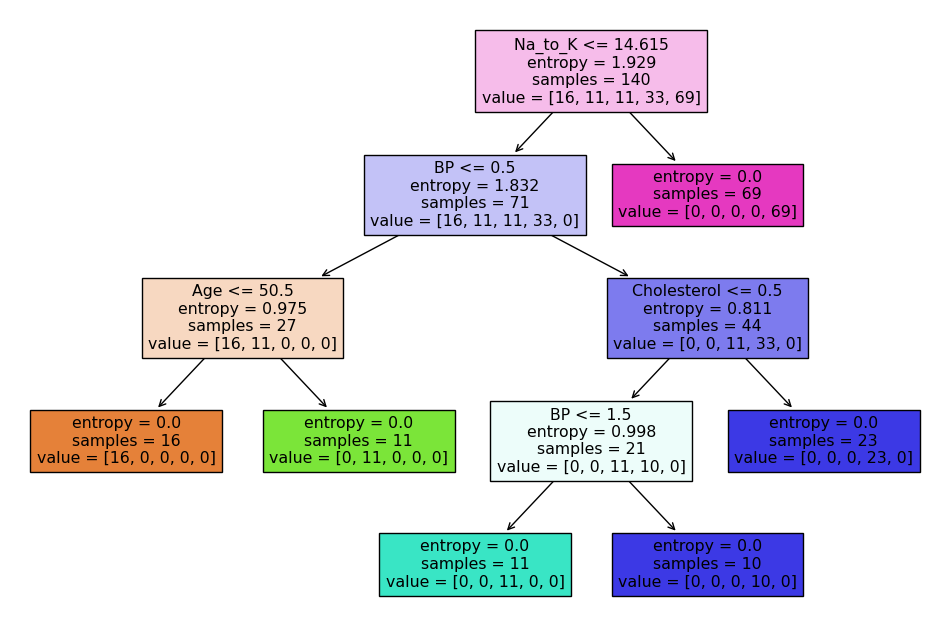

In [38]:
plt.figure(figsize=(12,8))
plot_tree(drugTree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
plt.show()